In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import tukey_hsd

In [4]:
benin = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville_clean.csv')
sierra_leone = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\solar-challenge-week1\data\sierraleone-bumbuna_clean.csv')
togo = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\solar-challenge-week1\data\togo_dapaong_clean.csv')

In [5]:
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

In [6]:
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

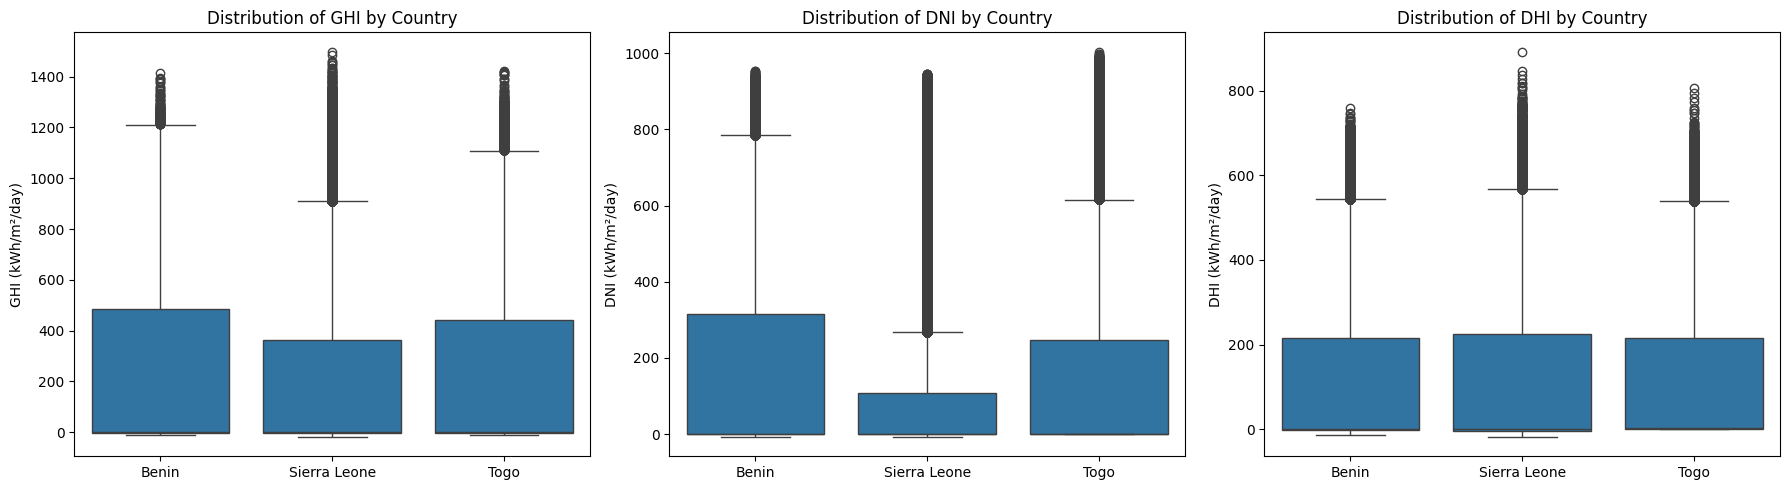

In [9]:
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'Distribution of {metric} by Country')
    plt.ylabel(f'{metric} (kWh/m²/day)')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [10]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [11]:
print("\nANOVA Results for GHI:")
f_val, p_val = stats.f_oneway(
    benin['GHI'],
    sierra_leone['GHI'],
    togo['GHI']
)
print(f"F-value: {f_val:.3f}, p-value: {p_val:.3e}")



ANOVA Results for GHI:
F-value: 2090.093, p-value: 0.000e+00


In [15]:
if p_val < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    print("\nTukey HSD Post-hoc Test:")
    tukey = pairwise_tukeyhsd(
        endog=df['GHI'],
        groups=df['Country'],
        alpha=0.05
    )
    print(tukey)


Tukey HSD Post-hoc Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
       Benin Sierra Leone -38.6019   0.0 -40.0543 -37.1495   True
       Benin         Togo -10.0044   0.0 -11.4568   -8.552   True
Sierra Leone         Togo  28.5975   0.0  27.1451  30.0499   True
-----------------------------------------------------------------


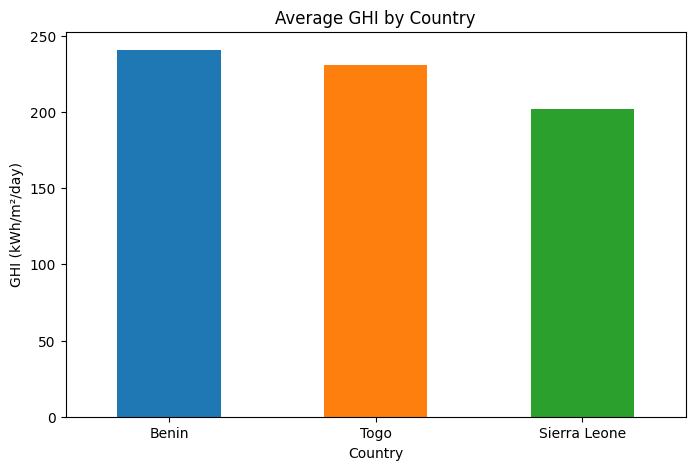

In [16]:
plt.figure(figsize=(8, 5))
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average GHI by Country')
plt.ylabel('GHI (kWh/m²/day)')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.show()